In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
df.isna().sum() #Проверка на выбросы

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True) #Общее количество нулевых строк составило 329, а общее количество строк - 16598, что составляет всего 1,9%, поэтому операция удаления может быть выполнена без ущерба для данных

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#Данные охватывают данные о продажах игр в мире на основных рынках с 1980 по 2020 год\
Североамериканский рынок имеет самый высокий средний объем продаж и самый высокий максимум продаж среди основных рынков\
Япония имеет самые низкие средние продажи и самые низкие максимальные продажи, и составляет всего 0,04 по сравнению с квартилями \
Все три рынка имеют крайне неравномерное распределение

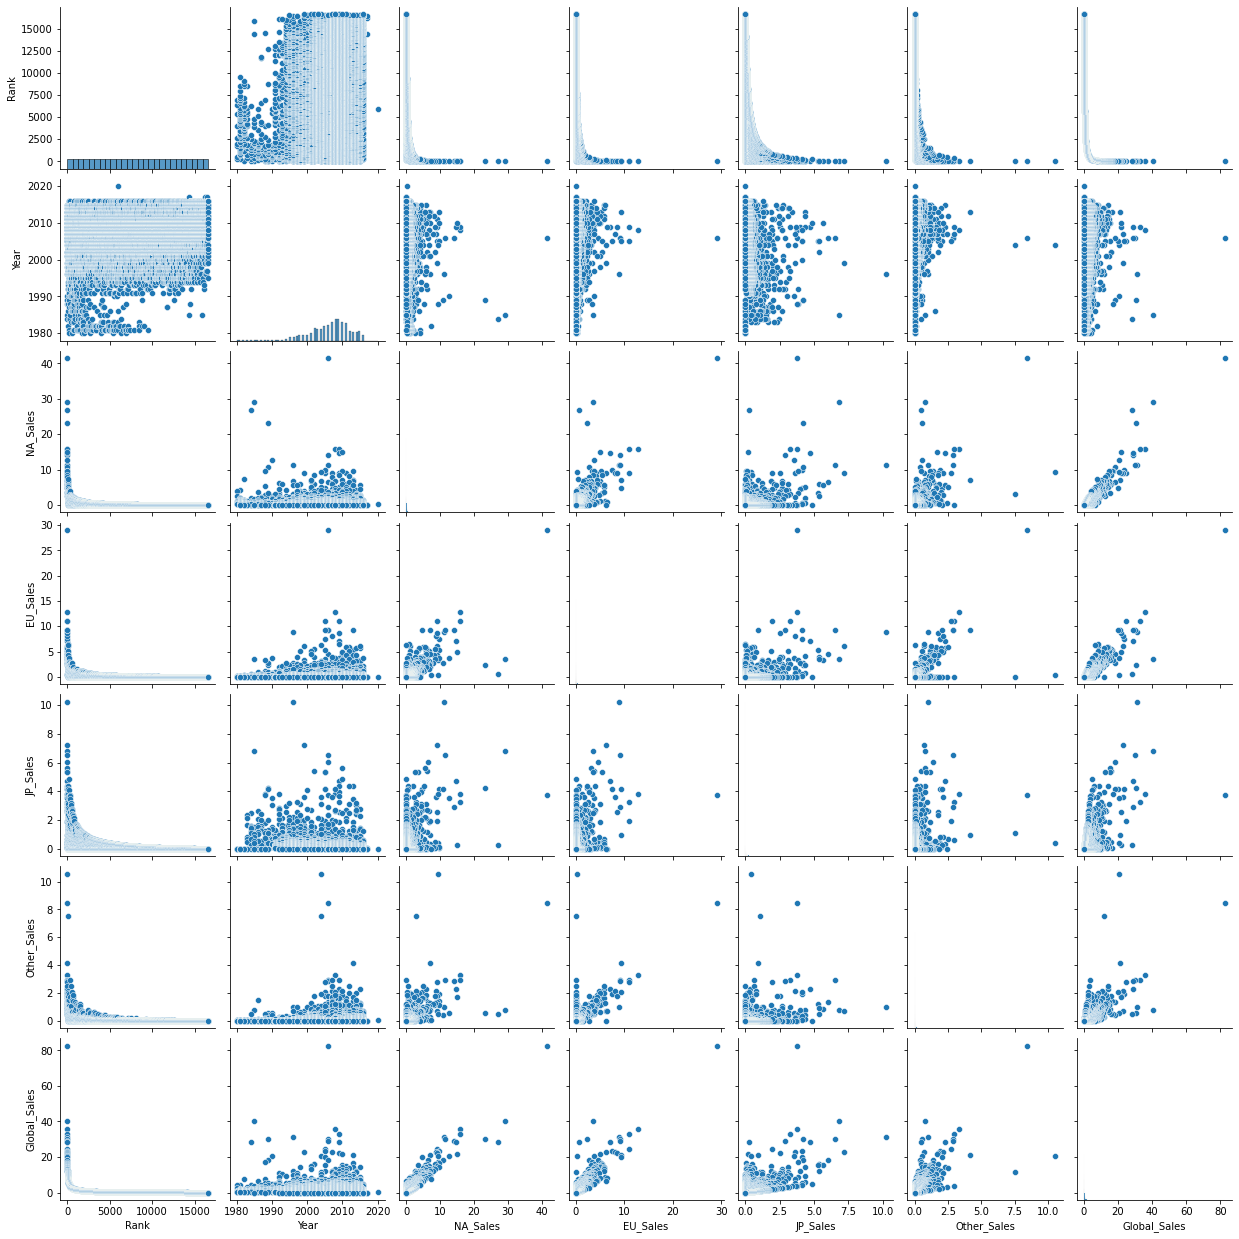

In [7]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

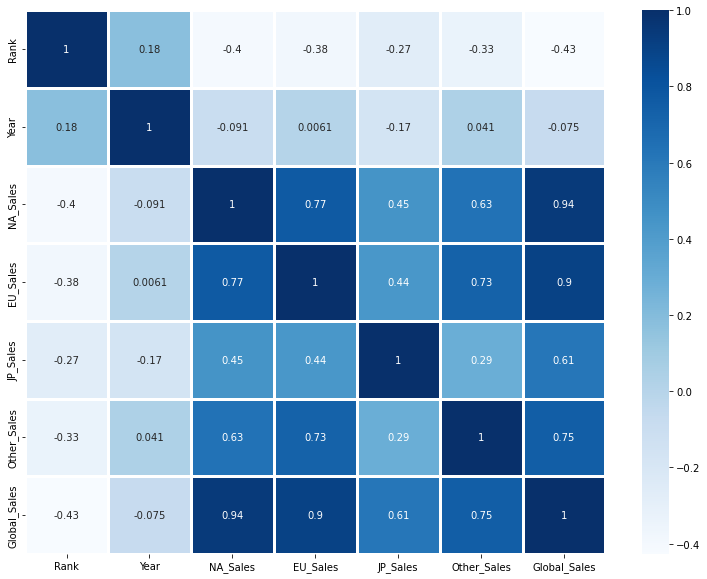

In [44]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap ='Blues', annot=True, linewidth=3)

#Мы можем видеть, что продажи в район Северная Америка и ЕС оказывают большое влияние на продажи в мире. А продажи по районам Северная Америка и продажи по странам ЕС в основном связаны между собой

In [12]:
print(len(df['Platform'].value_counts()))
print(len(df['Genre'].value_counts()))
print(len(df['Publisher'].value_counts()))

31
12
576


#Всего 31 игровая платформа, 12 игровых жанров, всего 578 издательств

In [13]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

# Десять самых издаваемых платформ для игр

<AxesSubplot:>

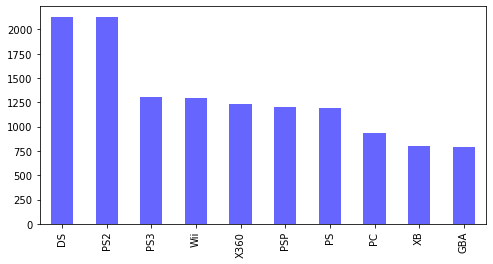

In [14]:
df['Platform'].value_counts().head(10).plot(kind='bar', alpha=0.6,color='Blue',figsize=(8,4))

# Десять самых издаваемых жанров игр

<AxesSubplot:>

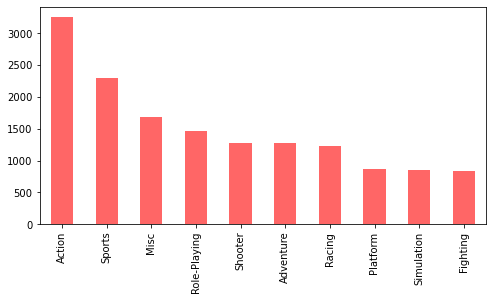

In [15]:
df['Genre'].value_counts().head(10).plot(kind='bar',alpha=0.6,color='Red',figsize=(8,4))

# Десять компаний, которые издают больше всего игр

<AxesSubplot:>

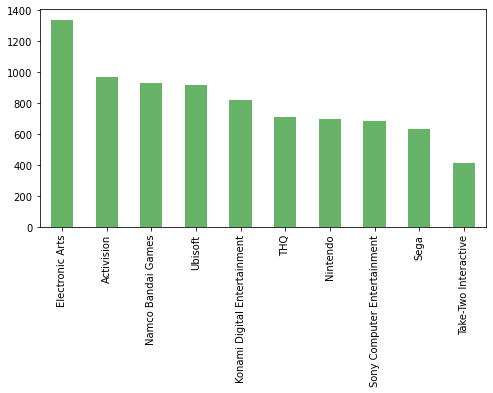

In [16]:
df['Publisher'].value_counts().head(10).plot(kind='bar',alpha=0.6,color='Green',figsize=(8,4))

# Топ-10 самых популярных игр

<AxesSubplot:xlabel='Name'>

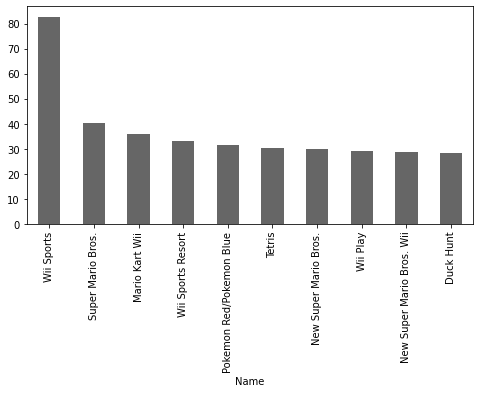

In [17]:
df_top10 = df.sort_values(by='Global_Sales', ascending=False).head(10)
df_top10.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar',alpha=0.6,color='Black',figsize=(8,4))

In [18]:
df_top10

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#Все издатели - Nintendo, что говорит о высоком качестве игр, выпускаемых этим издательством
Большинство игр в первой десятке относятся к жанрам экшн и соревновательных игр, при этом меньше людей играют в другие игры, например, музыкальные.

In [45]:
data = df.pivot_table(index='Genre',
                    values=['JP_Sales','EU_Sales',
                    'NA_Sales','Global_Sales'],
                    aggfunc=np.sum,)

data['NA_prop'] = data['NA_Sales']/data['Global_Sales']
data['JP_prop'] = data['JP_Sales']/data['Global_Sales']
data['EU_prop'] = data['EU_Sales']/data['Global_Sales']


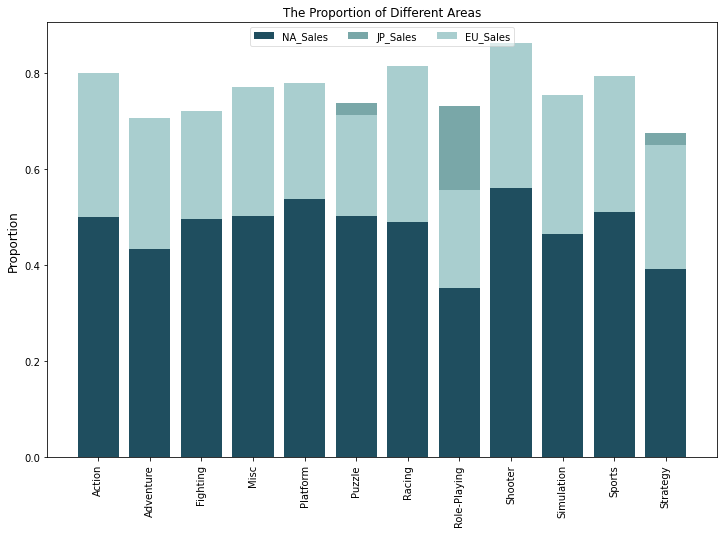

In [46]:
f,ax=plt.subplots(figsize=(12,8))
index=np.arange(len(data))
minColor = (31/256,78/256,95/256)   
midColor = (121/256,168/256,169/256)  
maxColor = (170/256,207/256,208/256) 

plt.bar(index,data.NA_prop,color=minColor)
plt.bar(
        index,data.JP_prop,
        bottom=data.NA_prop, 
        color=midColor
        )
plt.bar(
        index,data.EU_prop,
        bottom=data.NA_prop, 
        color=maxColor
        )
font={
    'family':'DejaVu Sans',
    'weight':'normal',
    'size':12
}
plt.xticks(index,data.index,rotation=90)
plt.title('The Proportion of Different Areas',font)
plt.ylabel('Proportion',font)
plt.legend(['NA_Sales','JP_Sales','EU_Sales'],
loc='upper center',ncol=3,framealpha=0.6)
plt.show()

#В Северной Америке были высокие продажи всех типов игр, а в Японии - только ролевых игр.

In [22]:
df.groupby('Year')['Name'].value_counts().to_frame()

Name
Year   Name                                                  
1980.0 Asteroids                                            1
       Boxing                                               1
       Bridge                                               1
       Checkers                                             1
       Defender                                             1
...                                                       ...
2016.0 Yuusha Shisu.                                        1
       ZombiU                                               1
2017.0 Phantasy Star Online 2 Episode 4: Deluxe Package     2
       Brothers Conflict: Precious Baby                     1
2020.0 Imagine: Makeup Artist                               1

[12095 rows x 1 columns]

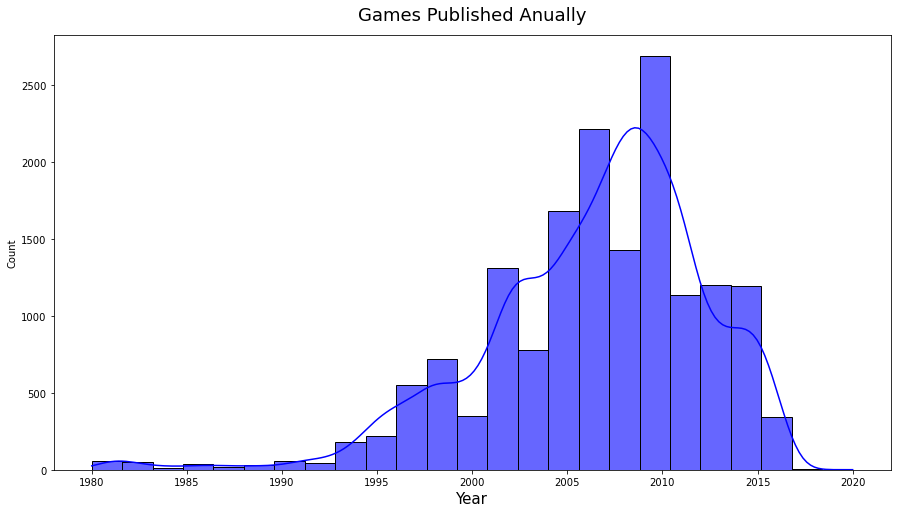

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(df["Year"],alpha=0.6,color='Blue',kde=True, bins=25)
plt.title("Games Published Anually",fontsize=18, y=1.02)
ax.set_xlabel("Year",fontsize=15);

#Количество выпущенных игр начало расти чрезвычайно быстро после 95-го года, с золотым периодом между 2005 и 2010 годами, после чего количество выпущенных игр начало значительно снижаться из-за различных факторов.

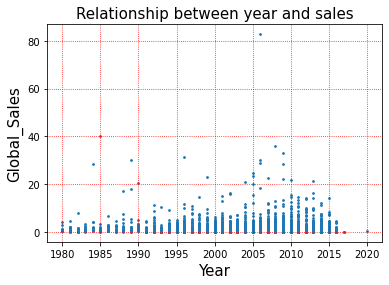

In [49]:
lx = df['Year'].apply(lambda x:float(x))

xl = df['Global_Sales']

plt.scatter(lx,xl,s=3)
plt.title('Relationship between year and sales',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Global_Sales',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.show()

#Продажи резко возросли с 1995 года\\.
Показатели достигли пика в период 2005-2010 годов\\
Но после 2015 года они снова начали стремительно падать.

# Далее мы используем данные, чтобы увидеть, какие жанры игр наиболее популярны с точки зрения пользователей, издателей и рынка, какие игровые платформы наиболее популярны, как изменилось положение игровых компаний на рынке, в какие жанры игр компаниям лучше всего инвестировать, а также основные условия и тенденции на рынке игр.

In [50]:
FGE = pd.pivot_table(df,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)

In [52]:
FGE = pd.DataFrame(data=FGE,columns={'Genre_sales'})

In [55]:
FGE_near5 = pd.pivot_table(df,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGE_near5 = pd.DataFrame(data=FGE_near5,columns={'Genre_sales'})

<AxesSubplot:xlabel='Genre', ylabel='Genre_sales'>

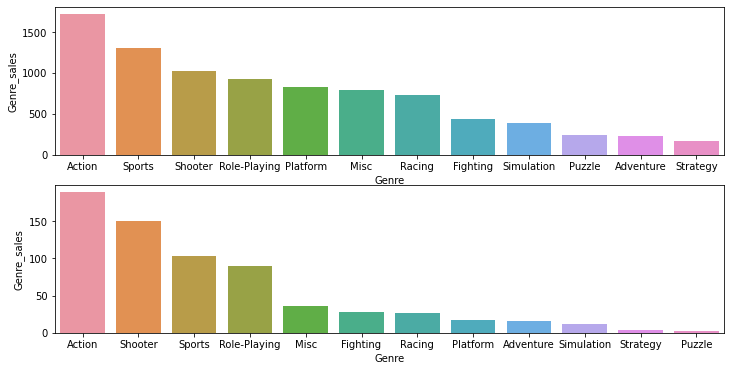

In [58]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FGE.index,y='Genre_sales',data=FGE,ax=ax1)
sns.barplot(x=FGE_near5.index,y='Genre_sales',data=FGE_near5,ax=ax2)

#Очевидно, что самым популярным жанром игр за последние пять лет остается экшн.\
Жанры спорта и съемки поменялись местами.\
Жанр горизонтальных игр может угаснуть из-за развития технологии 3D игр.\
Жанр саспенса значительно снизился, по неизвестным причинам.

In [59]:
FPF = pd.pivot_table(df,index='Year', columns='Platform', values='Global_Sales', aggfunc=np.sum).sum().sort_values(ascending=False)
FPF = pd.DataFrame(data=FPF, columns={'Global_Sales'})
FPF_near5 = pd.pivot_table(df,index='Year', columns='Platform', values='Global_Sales', aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FPF_near5 = pd.DataFrame(data=FPF_near5, columns={'Global_Sales'})

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

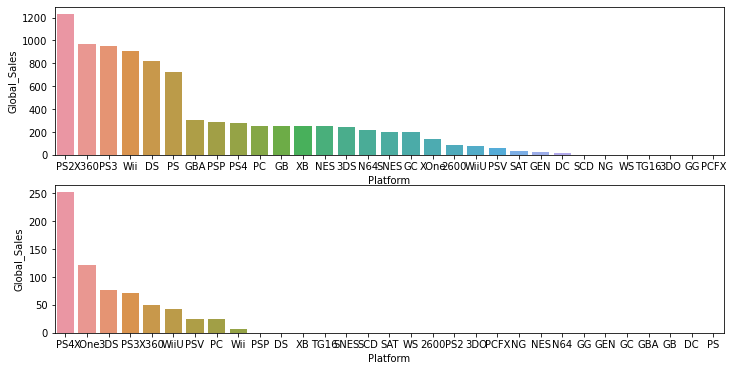

In [60]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,6))
sns.barplot(x=FPF.index,y='Global_Sales', data=FPF, ax=ax1)
sns.barplot(x=FPF_near5.index, y='Global_Sales', data=FPF_near5, ax=ax2)

#В целом, вы можете видеть, что времена изменились в плане технологий, и большинство старых платформ, которые не поддерживают новейшие игры, постепенно выводятся из употребления. \
PS2 нигде не видно, PS4 господствует, а DS и 3DS находятся в одинаковой ситуации. \
Старые платформы вытесняются более новыми версиями, X360 все еще держится.

<AxesSubplot:xlabel='Publisher', ylabel='Global_Sales'>

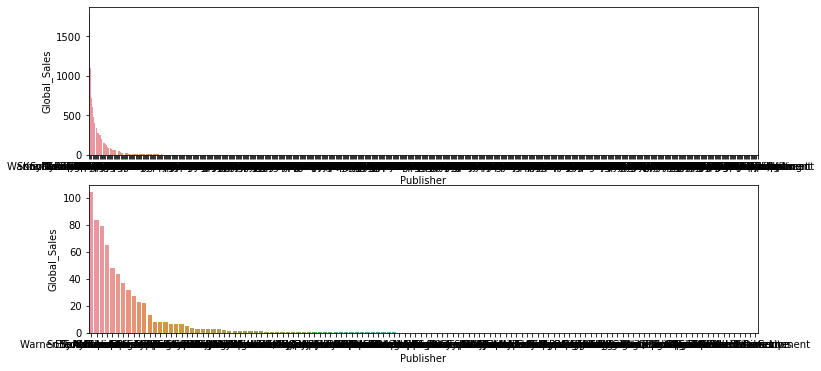

In [61]:
PBL = pd.pivot_table(data=df, index='Publisher', values='Global_Sales', aggfunc=np.sum)
PBL = PBL.sort_values(by='Global_Sales', ascending=False)
PBL_near5 = df[df['Year']>2013]
PBL_near5 = pd.pivot_table(data=PBL_near5, index='Publisher', values='Global_Sales',aggfunc=np.sum)
PBL_near5 = PBL_near5.sort_values(by='Global_Sales', ascending=False)

fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,6))
sns.barplot(x=PBL.index,y='Global_Sales', data=PBL, ax=ax1)
sns.barplot(x=PBL_near5.index,y='Global_Sales', data=PBL_near5, ax=ax2)

In [62]:
PBL_near5.head()

,Global_Sales
Publisher,
Electronic Arts,104.47
Activision,83.78
Nintendo,79.20
Ubisoft,64.79
Take-Two Interactive,48.18


In [66]:
PBL_pie = PBL_near5['Global_Sales'].sum()
PBL_near5['count'] = PBL_near5.apply(lambda x : x['Global_Sales']/PBL_pie,axis=1)
PBL_near5.rename(columns={'count':'percent'},inplace=True)

In [67]:
M = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

Text(0.5, 1.0, 'Five major market trends')

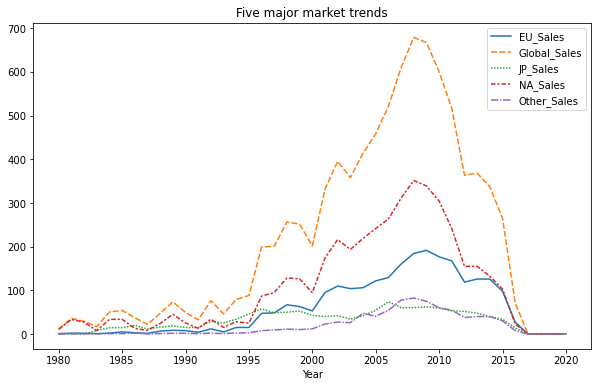

In [68]:
df_market = pd.pivot_table(df,index='Year', values=M, aggfunc=np.sum)
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=df_market)
plt.title('Five major market trends')

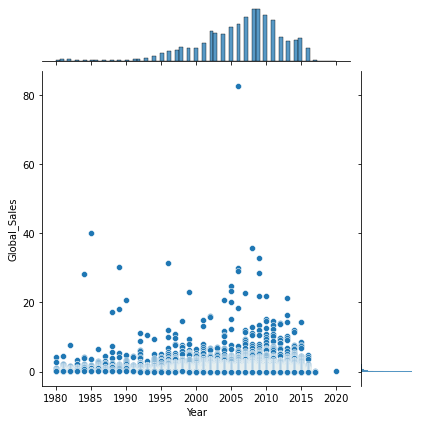

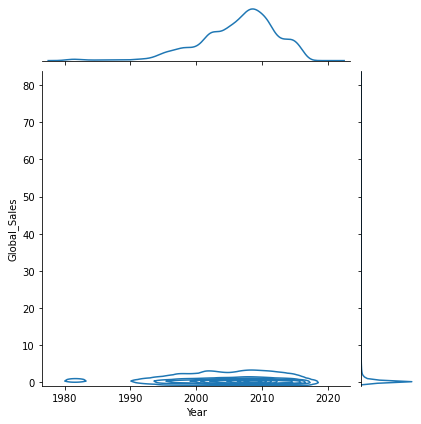

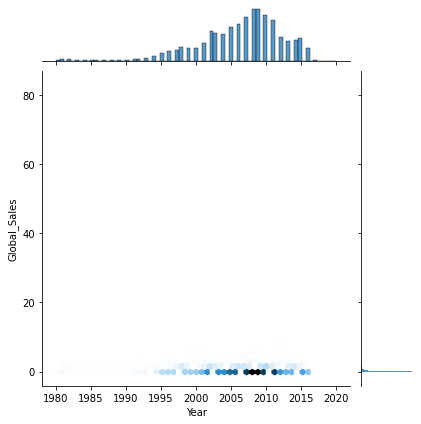

In [69]:
sns.jointplot(x="Year", y="Global_Sales", data=df, kind='scatter')
sns.jointplot(x="Year", y="Global_Sales", data=df, kind='kde')
sns.jointplot(x="Year", y="Global_Sales", data=df, kind='hex')
plt.show()

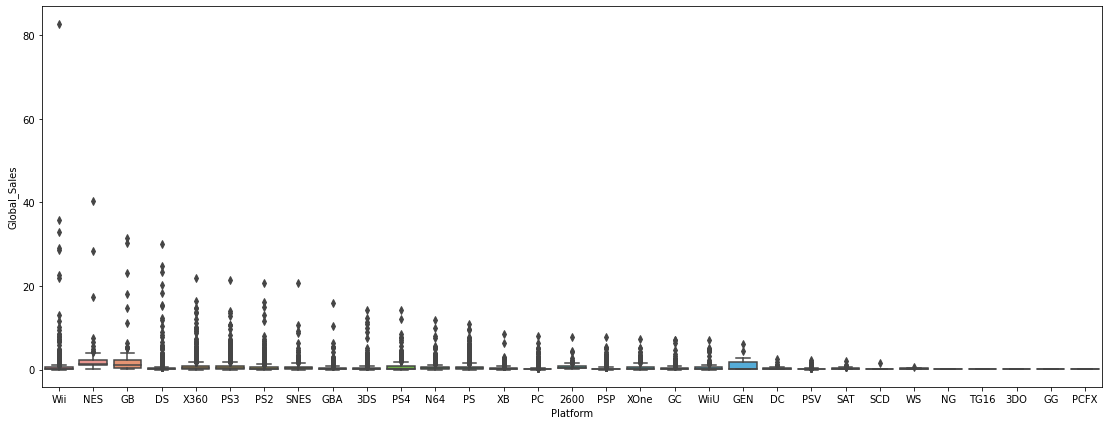

In [72]:
fig,ax = plt.subplots()
fig.set_size_inches(19,7)
sns.boxplot(x=df['Platform'],y=df['Global_Sales'],data=df)
plt.show()

#Как видно из графика, игры продавалась лучше всего на платформе wii, платформах nes и ds, и меньше всего на платформах ng, tg16, gg и pcfx.

In [73]:
df['Publisher'].value_counts().head()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: Publisher, dtype: int64

In [74]:
P = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment']

<AxesSubplot:title={'center':'Historical sales of the five major publishers'}, xlabel='Year'>

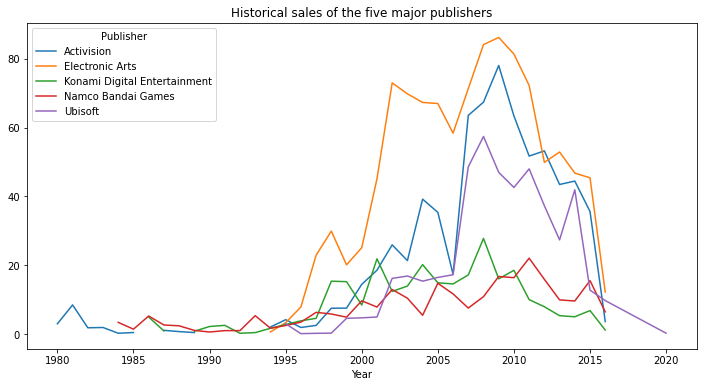

In [75]:
df5PBL = df[df['Publisher'].isin(P)]
df5PBL_p = pd.pivot_table(data=df5PBL,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
df5PBL_p.plot(title='Historical sales of the five major publishers',figsize=(12,6))

#Большинство компаний получили большой перерыв примерно в 2006 \
С 2009 года количество продаж компаний-издателей сократилось вместе

In [76]:
df5PBL_G = pd.pivot_table(data=df5PBL,index=['Genre','Publisher'], values=M, aggfunc=np.sum)
df5PBL_G.sort_values(by=['Genre','Global_Sales'], ascending=False).head() 

EU_Sales  Global_Sales  JP_Sales  \
Genre    Publisher                                                        
Strategy Activision                        7.94         17.70      0.00   
         Electronic Arts                   4.10         14.08      0.44   
         Namco Bandai Games                0.04         11.83     11.44   
         Konami Digital Entertainment      1.67         10.99      4.25   
         Ubisoft                           4.03          8.45      0.09   

                                       NA_Sales  Other_Sales  
Genre    Publisher                                            
Strategy Activision                        8.16         1.57  
         Electronic Arts                   8.84         0.67  
         Namco Bandai Games                0.14         0.21  
         Konami Digital Entertainment      4.45         0.64  
         Ubisoft                           3.23         1.12

In [77]:
df5PBL_Gpct = df5PBL_G.div(df5PBL_G.groupby(level=0).sum()).round(2)
df5PBL_Gpct = df5PBL_Gpct.sort_values(by=['Genre','Global_Sales'],ascending=False)
df5PBL_Gpct

EU_Sales  Global_Sales  JP_Sales  \
Genre        Publisher                                                        
Strategy     Activision                        0.45          0.28      0.00   
             Electronic Arts                   0.23          0.22      0.03   
             Namco Bandai Games                0.00          0.19      0.71   
             Konami Digital Entertainment      0.09          0.17      0.26   
             Ubisoft                           0.23          0.13      0.01   
Sports       Electronic Arts                   0.72          0.68      0.05   
             Konami Digital Entertainment      0.15          0.14      0.73   
             Activision                        0.09          0.11      0.00   
             Namco Bandai Games                0.01          0.03      0.21   
             Ubisoft                           0.04          0.03      0.00   
Simulation   Electronic Arts                   0.63          0.48      0.05   
             Ubisoft                           0.21          0.24      0.04   
             Konami Digital Entertainment      0.11          0.17      0.51   
             Namco Bandai Games                0.02          0.06      0.40   
             Activision                        0.04          0.04      0.00   
Shooter      Activision                        0.53          0.55      0.28   
             Electronic Arts                   0.31          0.29      0.18   
             Ubisoft                           0.13          0.13      0.06   
             Konami Digital Entertainment      0.01          0.02      0.22   
             Namco Bandai Games                0.01          0.02      0.26   
Role-Playing Namco Bandai Games                0.21          0.32      0.72   
             Activision                        0.40          0.28      0.01   
             Electronic Arts                   0.25          0.21      0.07   
             Ubisoft                           0.09          0.10      0.06   
             Konami Digital Entertainment      0.05          0.08      0.15   
Racing       Electronic Arts                   0.80          0.78      0.43   
             Activision                        0.06          0.09      0.01   
             Ubisoft                           0.10          0.08      0.04   
             Namco Bandai Games                0.04          0.04      0.50   
             Konami Digital Entertainment      0.00          0.01      0.01   
Puzzle       Ubisoft                           0.59          0.34      0.01   
             Namco Bandai Games                0.10          0.32      0.90   
             Electronic Arts                   0.28          0.24      0.00   
             Activision                        0.02          0.06      0.04   
             Konami Digital Entertainment      0.01          0.04      0.05   
Platform     Activision                        0.36          0.42      0.01   
             Ubisoft                           0.41          0.27      0.01   
             Konami Digital Entertainment      0.10          0.19      0.77   
             Electronic Arts                   0.12          0.08      0.01   
             Namco Bandai Games                0.02          0.04      0.20   
Misc         Ubisoft                           0.48          0.40      0.02   
             Activision                        0.28          0.32      0.00   
             Namco Bandai Games                0.07          0.12      0.78   
             Electronic Arts                   0.10          0.08      0.00   
             Konami Digital Entertainment      0.06          0.08      0.19   
Fighting     Namco Bandai Games                0.56          0.59      0.95   
             Electronic Arts                   0.33          0.30      0.00   
             Ubisoft                           0.07          0.07      0.02   
             Activision                        0.03          0.03      0.00   
             K

#EA закрепилась в секторе спортивных и симуляционных игр. \
Activision лидирует в сегменте стрелялок. \
Ubisoft и Blizzard равны в жанре действии.

In [80]:
PBL_near5p = df[(df['Year']>2013) & (df['Publisher'].isin(P))]
PBL_near5pshare = pd.pivot_table(data=PBL_near5p, index=['Genre','Publisher'],values=M,aggfunc=np.sum)
PBL_near5pshare_pct = PBL_near5pshare.div(PBL_near5pshare.groupby(level=0).sum()).round(2)
PBL_near5pshare_pct = PBL_near5pshare_pct.sort_values(by=['Genre','Global_Sales'],ascending=False)
PBL_near5pshare_pct

EU_Sales  Global_Sales  JP_Sales  \
Genre        Publisher                                                        
Strategy     Activision                        0.49          0.41      0.00   
             Namco Bandai Games                0.00          0.33      1.00   
             Ubisoft                           0.51          0.26      0.00   
Sports       Electronic Arts                   0.93          0.92      0.14   
             Konami Digital Entertainment      0.06          0.07      0.75   
             Activision                        0.00          0.01      0.00   
             Namco Bandai Games                0.00          0.00      0.11   
             Ubisoft                           0.01          0.00      0.00   
Simulation   Electronic Arts                   1.00          0.89      0.00   
             Ubisoft                           0.00          0.08      0.00   
             Namco Bandai Games                0.00          0.02      1.00   
Shooter      Activision                        0.57          0.61      0.55   
             Electronic Arts                   0.23          0.23      0.24   
             Ubisoft                           0.20          0.17      0.21   
             Namco Bandai Games                0.00          0.00      0.00   
Role-Playing Namco Bandai Games                0.56          0.60      0.94   
             Electronic Arts                   0.21          0.19      0.03   
             Activision                        0.14          0.11      0.01   
             Ubisoft                           0.10          0.09      0.01   
Racing       Ubisoft                           0.52          0.52      0.29   
             Electronic Arts                   0.46          0.46      0.36   
             Namco Bandai Games                0.02          0.02      0.36   
Puzzle       Activision                        0.00          0.88       NaN   
             Ubisoft                           1.00          0.12       NaN   
Platform     Ubisoft                           0.80          0.69      0.00   
             Electronic Arts                   0.19          0.23      1.00   
             Activision                        0.01          0.08      0.00   
Misc         Ubisoft                           0.81          0.76      0.00   
             Activision                        0.19          0.17      0.00   
             Namco Bandai Games                0.00          0.07      1.00   
Fighting     Namco Bandai Games                1.00          1.00      1.00   
Adventure    Namco Bandai Games                0.40          0.57      0.94   
             Activision                        0.60          0.41      0.00   
             Konami Digital Entertainment      0.00          0.02      0.06   
Action       Ubisoft                           0.61          0.54      0.08   
             Activision                        0.19          0.19      0.01   
             Konami Digital Entertainment      0.14          0.15      0.24   
             Namco Bandai Games                0.04          0.11      0.67   
             Electronic Arts                   0.02          0.02      0.00   

                                           NA_Sales  Other_Sales  
Genre        Publisher                                            
Strategy     Activision                        0.91         0.80  
             Namco Bandai Games                0.00         0.00  
             Ubisoft                           0.09         0.20  
Sports       Electronic Arts                   0.97         0.94  
             Konami Digital Entertainment      0.02         0.05  
             Activision                        0.01         0.01  
             Namco Bandai Games                0.00         0.00  
             Ubisoft                           0.00         0.00  
Simulation   Electronic Arts                   0.79         0.94  
             Ubisoft                           0.21         0.06  

#EA имеет монополию на спорт.\
Activision более заметна в категориях стратегий, шутеров и приключений. \
Ubisoft, с другой стороны, удерживает большую часть рынка в категориях "экшн" и "новые территории".

# В целом, из-за финансового кризиса 2008 года и влияния компьютерных и портативных игр, видеоигры начали бурно развиваться в 1995 году, достигли пика в 2008 году, и с тех пор начали ослабевать и демонстрировать значительный спад.

#Северная Америка является основным рынком для видеоигр, и ее покупательская способность самая высокая, за ней следует Европа.\
В целом, PS2 является самой популярной платформой среди геймеров, но теперь ее заменила PS4.\
Экшн-игры были самым популярным жанром среди геймеров, за ними следуют шутеры и спортивные игры.

#Если бы компания Activision Blizzard выпустила шутер под названием "Вкусточка" сейчас, спрогнозируйте продажи и общий рейтинг на пяти ведущих рынках

In [81]:
AS = df[(df['Year']<2020) & (df['Genre']=='Shooter') & (df['Publisher']=='Activision')]
AS.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


In [82]:
AS_p = pd.pivot_table(data=AS, index='Year', values=M, aggfunc=np.sum) 
AS_p.head()

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Year,,,,,
1981.0,0.15,2.70,0.0,2.52,0.03
1982.0,0.03,0.50,0.0,0.47,0.01
1988.0,0.03,0.51,0.0,0.47,0.01
1996.0,0.04,0.10,0.0,0.05,0.01
1998.0,0.16,0.41,0.0,0.23,0.03


In [83]:
AS_p.index = AS_p.index.astype(str)
AS_p.index = AS_p.index.str.replace('\.0','')
AS_p.index

/var/folders/tn/_70hg6tj035g42snbnmglwwr0000gn/T/ipykernel_59106/1266735409.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  AS_p.index = AS_p.index.str.replace('\.0','')


Index(['1981', '1982', '1988', '1996', '1998', '1999', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016'],
      dtype='object', name='Year')

In [84]:
AS_p['Date_Time'] = pd.to_datetime(AS_p.index)
AS_p.index = AS_p.Date_Time
AS_p.drop(['Date_Time'], axis=1, inplace=True)
AS_p.tail()

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Date_Time,,,,,
2012-01-01,11.41,30.51,0.72,14.39,3.99
2013-01-01,9.47,28.83,0.48,15.78,3.06
2014-01-01,12.30,34.59,0.62,17.10,4.55
2015-01-01,10.86,29.19,0.49,13.86,3.93
2016-01-01,1.19,3.15,0.14,1.41,0.39


In [85]:
train = AS_p[:int(0.8*(len(AS_p)))]
valid = AS_p[int(0.8*(len(AS_p))):]

from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=train)
model_fit = model.fit()

prediction = model_fit.forecast(model_fit.y, steps=len(valid))

model = VAR(endog=AS_p)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

/Users/alexjiang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AttributeError: 'VARResults' object has no attribute 'y'